In [1]:

"""
SECTION 1 : Load and setup data for training
"""
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
datatrain = pd.read_csv('iris.csv')

# Change string value to numeric
datatrain.loc[datatrain['species']=='setosa', 'species']=0
datatrain.loc[datatrain['species']=='versicolor', 'species']=1
datatrain.loc[datatrain['species']=='virginica', 'species']=2
datatrain = datatrain.apply(pd.to_numeric)

# Change dataframe to array
datatrain_array = datatrain.as_matrix()

# Split x and y (feature and target)
X_train, X_test, y_train, y_test = train_test_split(datatrain_array[:,:4],
                                                    datatrain_array[:,4],
                                                    test_size=0.2)

"""
SECTION 2 : Build and Train Model
Multilayer perceptron model, with one hidden layer.
input layer : 4 neuron, represents the feature of Iris
hidden layer : 10 neuron, activation using ReLU
output layer : 3 neuron, represents the class of Iris, Softmax Layer
optimizer = stochastic gradient descent with no batch-size
loss function = categorical cross entropy
learning rate = 0.01
epoch = 500
"""

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(2,5),solver='sgd',learning_rate_init=0.01,max_iter=500)

# Train the model
mlp.fit(X_train, y_train)

# Test the model
print(mlp.score(X_test,y_test))

sl = 5.8
sw = 2
pl = 1
pw = 6
data = [sl,sw,pl,pw]
#print(mlp.predict(data))

pred=mlp.predict_proba(X_test)
pred


/usr/lib/python3/dist-packages/ipykernel/__main__.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


0.36666666666666664


array([[0.34543943, 0.33499051, 0.31957006],
       [0.34543943, 0.33499051, 0.31957006],
       [0.34543943, 0.33499051, 0.31957006],
       [0.34543943, 0.33499051, 0.31957006],
       [0.34543943, 0.33499051, 0.31957006],
       [0.34543943, 0.33499051, 0.31957006],
       [0.34543943, 0.33499051, 0.31957006],
       [0.34543943, 0.33499051, 0.31957006],
       [0.34543943, 0.33499051, 0.31957006],
       [0.34543943, 0.33499051, 0.31957006],
       [0.34543943, 0.33499051, 0.31957006],
       [0.34543943, 0.33499051, 0.31957006],
       [0.34543943, 0.33499051, 0.31957006],
       [0.34543943, 0.33499051, 0.31957006],
       [0.34543943, 0.33499051, 0.31957006],
       [0.34543943, 0.33499051, 0.31957006],
       [0.34543943, 0.33499051, 0.31957006],
       [0.34543943, 0.33499051, 0.31957006],
       [0.34543943, 0.33499051, 0.31957006],
       [0.34543943, 0.33499051, 0.31957006],
       [0.34543943, 0.33499051, 0.31957006],
       [0.34543943, 0.33499051, 0.31957006],
       [0.

In [2]:
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)

def reliability_curve(y_true, y_score, bins=10, normalize=False):
    """Compute reliability curve

    Reliability curves allow checking if the predicted probabilities of a
    binary classifier are well calibrated. This function returns two arrays
    which encode a mapping from predicted probability to empirical probability.
    For this, the predicted probabilities are partitioned into equally sized
    bins and the mean predicted probability and the mean empirical probabilties
    in the bins are computed. For perfectly calibrated predictions, both
    quantities whould be approximately equal (for sufficiently many test
    samples).

    Note: this implementation is restricted to binary classification.

    Parameters
    ----------

    y_true : array, shape = [n_samples]
        True binary labels (0 or 1).

    y_score : array, shape = [n_samples]
        Target scores, can either be probability estimates of the positive
        class or confidence values. If normalize is False, y_score must be in
        the interval [0, 1]

    bins : int, optional, default=10
        The number of bins into which the y_scores are partitioned.
        Note: n_samples should be considerably larger than bins such that
              there is sufficient data in each bin to get a reliable estimate
              of the reliability

    normalize : bool, optional, default=False
        Whether y_score needs to be normalized into the bin [0, 1]. If True,
        the smallest value in y_score is mapped onto 0 and the largest one
        onto 1.


    Returns
    -------
    y_score_bin_mean : array, shape = [bins]
        The mean predicted y_score in the respective bins.

    empirical_prob_pos : array, shape = [bins]
        The empirical probability (frequency) of the positive class (+1) in the
        respective bins.


    References
    ----------
    .. [1] `Predicting Good Probabilities with Supervised Learning
            <http://machinelearning.wustl.edu/mlpapers/paper_files/icml2005_Niculescu-MizilC05.pdf>`_

    """
    if normalize:  # Normalize scores into bin [0, 1]
        y_score = (y_score - y_score.min()) / (y_score.max() - y_score.min())

    bin_width = 1.0 / bins
    bin_centers = np.linspace(0, 1.0 - bin_width, bins) + bin_width / 2

    y_score_bin_mean = np.empty(bins)
    empirical_prob_pos = np.empty(bins)
    for i, threshold in enumerate(bin_centers):
        # determine all samples where y_score falls into the i-th bin
        bin_idx = np.logical_and(threshold - bin_width / 2 < y_score,
                                 y_score <= threshold + bin_width / 2)
        # Store mean y_score and mean empirical probability of positive class
        y_score_bin_mean[i] = y_score[bin_idx].mean()
        empirical_prob_pos[i] = y_true[bin_idx].mean()
    return y_score_bin_mean, empirical_prob_pos

In [3]:
import pandas as pd
import numpy as np
import pylab as plt
#import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)
%matplotlib inline

# Load dataset
datatrain = pd.read_csv('iris.csv')

# Change string value to numeric
datatrain.loc[datatrain['species']=='setosa', 'species']=0
datatrain.loc[datatrain['species']=='versicolor', 'species']=1
datatrain.loc[datatrain['species']=='virginica', 'species']=2
datatrain = datatrain.apply(pd.to_numeric)

# Change dataframe to array
datatrain_array = datatrain.as_matrix()

# Split x and y (feature and target)
X_train, X_test, Y_train, Y_test = train_test_split(datatrain_array[:,:4],
                                                    datatrain_array[:,4],
                                                    test_size=0.2)

/usr/lib/python3/dist-packages/ipykernel/__main__.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [8]:
from sklearn.neural_network import MLPClassifier

bins=25

reliability_scores = {}
y_score = {}
clf = MLPClassifier(solver='adam',alpha=1e-5,hidden_layer_sizes=(100,100),random_state=1)

clf.fit(X_train,Y_train)
pred=clf.predict(X_test)

y_score['MLP classifier'] = clf.predict_proba(X_test)[:,1]
reliability_scores['MLP classifier']=\
reliability_curve(Y_test , y_score['MLP classifier'], bins=bins , normalize=False)

/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/usr/lib/python3/dist-packages/ipykernel/__main__.py:70: RuntimeWarning: Mean of empty slice.
/home/tumisang/.local/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3/dist-packages/ipykernel/__main__.py:71: RuntimeWarning: Mean of empty slice.


	Accuracy: 1.000


ValueError: Target is multiclass but average='binary'. Please choose another average setting.

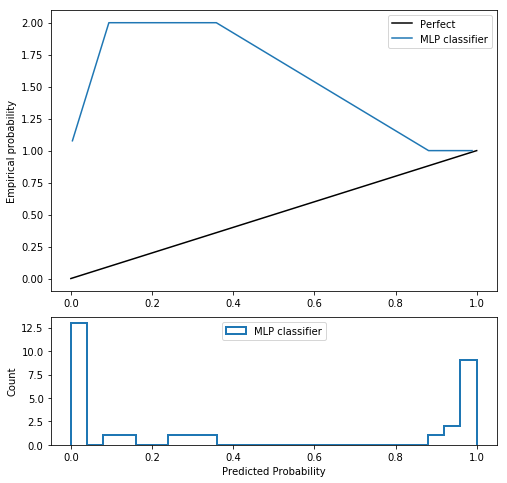

In [10]:

plt.figure(0, figsize=(8, 8))
plt.subplot2grid((3, 1), (0, 0), rowspan=2)
plt.plot([0.0, 1.0], [0.0, 1.0], 'k', label="Perfect") 
for method, (y_score_bin_mean, empirical_prob_pos) in reliability_scores.items():
    scores_not_nan = np.logical_not(np.isnan(empirical_prob_pos))
    plt.plot(y_score_bin_mean[scores_not_nan],
             empirical_prob_pos[scores_not_nan], label=method)
plt.ylabel("Empirical probability")
plt.legend(loc=0)

plt.subplot2grid((3, 1), (2, 0))
for method, y_score_ in y_score.items():
    y_score_ = (y_score_ - y_score_.min()) / (y_score_.max() - y_score_.min())
    plt.hist(y_score_, range=(0, 1), bins=bins, label=method,
             histtype="step", lw=2)
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.legend(loc='upper center', ncol=2)

print("\tAccuracy: %1.3f"%clf.score(X_test, Y_test))
print("\tPrecision: %1.3f" % precision_score(Y_test, pred))
print("\tRecall: %1.3f" % recall_score(Y_test, pred))
print("\tF1: %1.3f\n" % f1_score(Y_test, pred))

In [18]:
import theano
import pymc3 as pm
import sklearn


def construct_nn(ann_input, ann_output):
    n_hidden = 9
    
    
    # Initialize random weights between each layer
    init_1 = np.random.randn((X_train.shape[1]), n_hidden).astype(float)
    init_2 = np.random.randn(n_hidden, n_hidden).astype(float)
    init_3 = np.random.randn(n_hidden, n_hidden).astype(float)
    init_4 = np.random.randn(n_hidden, n_hidden).astype(float)
    init_out = np.random.randn(n_hidden).astype(float)
        
    with pm.Model() as neural_network:
        # Weights from input to hidden layer
        weights_in_1 = pm.Normal('w_in_1', 0, sd=1, 
                                 shape=(X_train.shape[1], n_hidden), 
                                 testval=init_1)
        
        # Weights from 1st to 2nd layer
        weights_1_2 = pm.Normal('w_1_2', 0, sd=1, 
                                shape=(n_hidden, n_hidden), 
                                testval=init_2)
        
        # Weights from 2st to 3nd layer
        weights_2_3 = pm.Normal('w_2_3', 0, sd=1, 
                                shape=(n_hidden, n_hidden), 
                                testval=init_3)
                # Weights from 3rd to 4th layer
        weights_3_4 = pm.Normal('w_3_4', 0, sd=1, 
                                shape=(n_hidden, n_hidden), 
                                testval=init_3)
        
        # Weights from hidden layer to output
        weights_4_out = pm.Normal('w_4_out', 0, sd=1, 
                                  shape=(n_hidden,), 
                                  testval=init_out)
        
        # Build neural-network using tanh activation function
        act_1 = pm.math.tanh(pm.math.dot(ann_input, 
                                         weights_in_1))
        act_2 = pm.math.tanh(pm.math.dot(act_1, 
                                         weights_1_2))
        act_3 = pm.math.tanh(pm.math.dot(act_2, 
                                         weights_2_3))
        act_4 = pm.math.tanh(pm.math.dot(act_3, 
                                         weights_3_4))
        act_out = pm.math.sigmoid(pm.math.dot(act_4, 
                                              weights_4_out))
        
        # Binary classification -> Bernoulli likelihood
        out = pm.Categorical('out', 
                           act_out,
                           observed=ann_output,
                           total_size=Y_train.shape[0] # IMPORTANT for minibatches
                          )
    return neural_network

# Trick: Turn inputs and outputs into shared variables. 
# It's still the same thing, but we can later change the values of the shared variable 
# (to switch in the test-data later) and pymc3 will just use the new data. 
# Kind-of like a pointer we can redirect.
# For more info, see: http://deeplearning.net/software/theano/library/compile/shared.html
ann_input = theano.shared(X_train)
ann_output = theano.shared(Y_train)
neural_network = construct_nn(ann_input, ann_output)


In [15]:
import pymc3 as pm

In [16]:
pm.Sof

In [19]:
from pymc3.theanof import set_tt_rng, MRG_RandomStreams
set_tt_rng(MRG_RandomStreams(42))
from pymc3 import Normal,Metropolis, sample,find_MAP


In [20]:
with neural_network:
    
    start = find_MAP()
    step = Metropolis()

    trace = sample(1000, step, start)

logp = -536.63, ||grad|| = 2.247: 100%|██████████| 1840/1840 [00:03<00:00, 556.56it/s]
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [w_4_out]
>Metropolis: [w_3_4]
>Metropolis: [w_2_3]
>Metropolis: [w_1_2]
>Metropolis: [w_in_1]
100%|██████████| 1500/1500 [00:07<00:00, 208.53it/s]
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [22]:

bins=25

reliability_scores = {}
y_score = {}

ann_input.set_value(X_test)
ann_output.set_value(Y_test)


with neural_network:
    ppc= pm.sample_ppc(trace, samples=1000, progressbar=False)

pred = ppc['out'].mean(axis=0) > 0.5
pred_binary=pred.astype(int)

y_score['BNN'] = ppc['out'].mean(axis=0)
reliability_scores['BNN']=\
reliability_curve(Y_test , y_score['BNN'], bins=bins , normalize=False)

ValueError: a and p must have same size

No handles with labels found to put in legend.


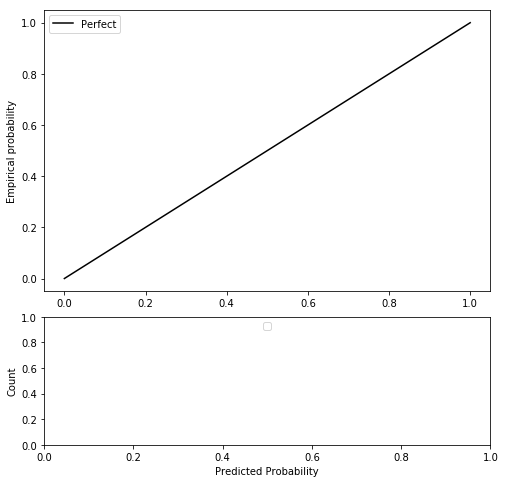

In [23]:
plt.figure(0, figsize=(8, 8))
plt.subplot2grid((3, 1), (0, 0), rowspan=2)
plt.plot([0.0, 1.0], [0.0, 1.0], 'k', label="Perfect") 
for method, (y_score_bin_mean, empirical_prob_pos) in reliability_scores.items():
    scores_not_nan = np.logical_not(np.isnan(empirical_prob_pos))
    plt.plot(y_score_bin_mean[scores_not_nan],
             empirical_prob_pos[scores_not_nan], label=method)
plt.ylabel("Empirical probability")
plt.legend(loc=0)

plt.subplot2grid((3, 1), (2, 0))
for method, y_score_ in y_score.items():
    y_score_ = (y_score_ - y_score_.min()) / (y_score_.max() - y_score_.min())
    plt.hist(y_score_, range=(0, 1), bins=bins, label=method,
             histtype="step", lw=2)
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.legend(loc='upper center', ncol=2)